<a href="https://colab.research.google.com/github/Nawin03-DS/ML-Project/blob/main/ML_Project_on_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv('titanic.csv')

# Display first 5 rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
# Check data info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Fill missing values for 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# Confirm missing value treatment
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

/tmp/ipython-input-3095652226.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3095652226.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [6]:
# Convert Sex to numeric: male=0, female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert Embarked to numeric
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Create new feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

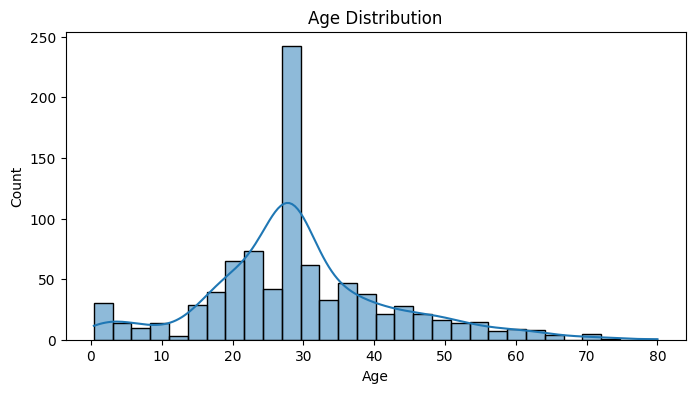

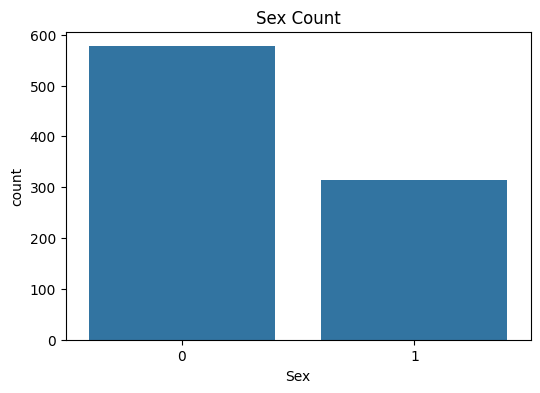

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  FamilySize  
count  891.000000  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    0.361392    1.904602  
std      1.102743    0.806057   49.693429    0.635673    1.613459  
min      0.000000    0.000000    0.000000    0.000000    1.000000  
25%      0.000000    0.000000

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Countplot for Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title('Sex Count')
plt.show()

# Summary statistics
print(df.describe())

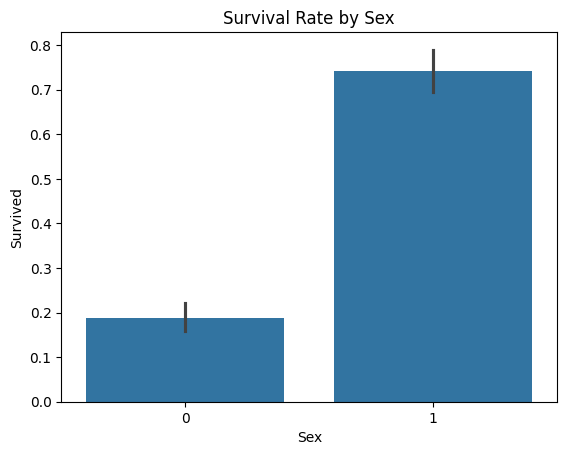

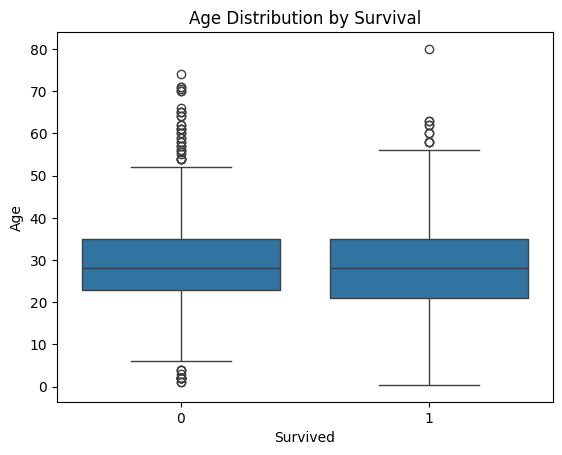

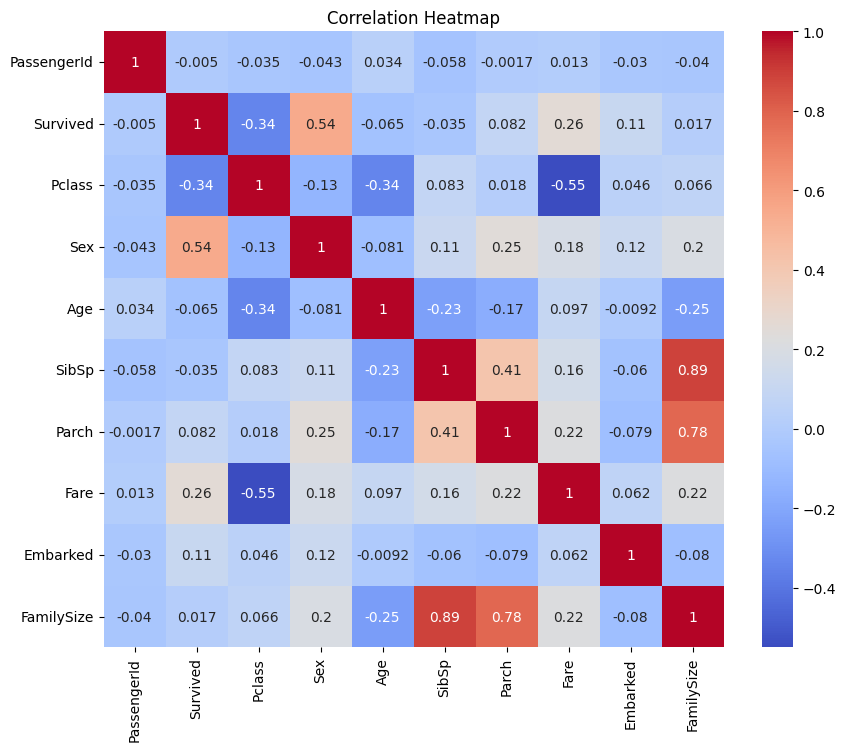

In [10]:
# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Age vs Survival boxplot
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

# Drop non-numeric columns for correlation heatmap
df_numeric = df.drop(columns=['Name', 'Ticket'])

# Correlation heatmap of numeric variables
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

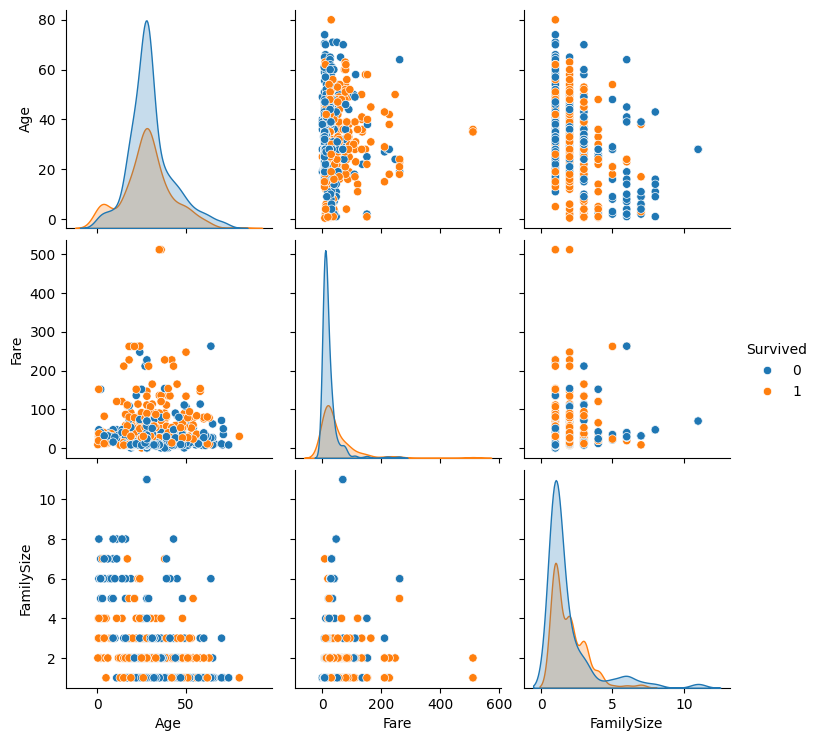

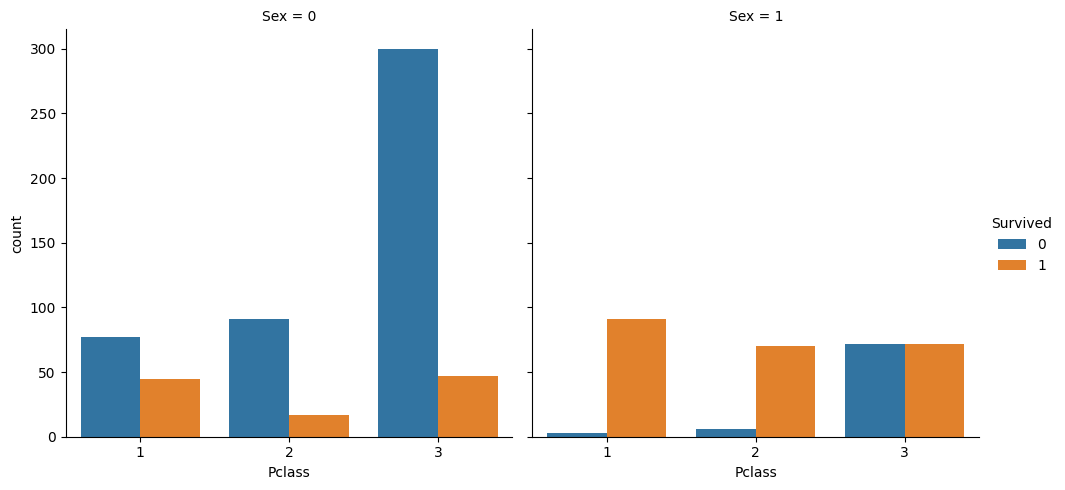

In [9]:
# Pairplot of selected variables colored by survival
sns.pairplot(df[['Age', 'Fare', 'FamilySize', 'Survived']], hue='Survived')
plt.show()

# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=df)
plt.show()

In [ ]:
#Women had a higher survival rate than men.

#Younger passengers were more likely to survive.

#First-class passengers had better survival chances.

#Family size influences survival (small vs. large families).